In [1]:
import os,sys
os.chdir('../../')
sys.path.append('./src/probability')
sys.path.append('./src/data')
sys.path.append('./src/events')
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from IC.processer import *
from IC.importer import *
from IC.main import integrate
res = get_IC_data()
Ereco = 500*10**(np.linspace(0.0,1.3,14))
model = train_energy_resolution(False)
ztrue = np.linspace(-1,0,100)
interp_flux = interpolate_flux(False)
aeff_list = interpolate_aeff(False)
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [2]:
df = pd.read_csv('~/NuFSGenMC_nominal.dat', header=None, skiprows=12,delimiter=' ', names=['pdg','reco_energy', 'reco_coszen','true_energy','true_coszen','weight', 'flux1','flux2']).query('reco_energy > 500 and reco_energy < 10000')
sample_df = df.sample(1000)
mu_mask = (sample_df['pdg'] == 13)
mubar_mask = (sample_df['pdg'] == -13)
flux = np.zeros_like(sample_df['weight'])
flux[mu_mask] = get_flux('m',sample_df[mu_mask].true_energy, sample_df[mu_mask].true_coszen, interp_flux)
flux[mubar_mask] = get_flux('m',sample_df[mubar_mask].true_energy, sample_df[mubar_mask].true_coszen, interp_flux)

sample_df['rate_weight'] = sample_df['weight']*flux

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


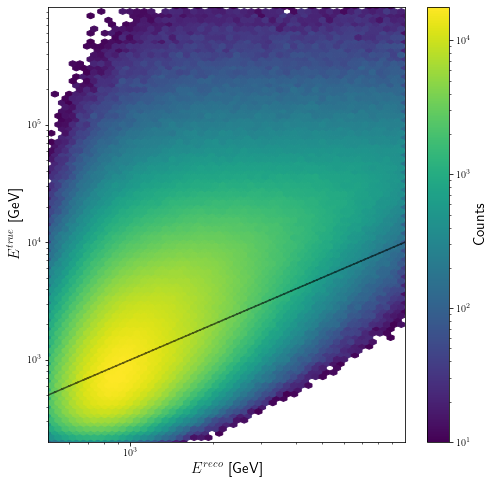

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
hb = plt.hexbin(df.reco_energy, df.true_energy, xscale='log', yscale='log', gridsize=(50,50), bins='log', mincnt=10)
plt.plot(df.reco_energy, df.reco_energy, ls = '--',alpha = 0.6, c='black')
plt.ylim(df.true_energy.min(), df.true_energy.max())
plt.xlim(df.reco_energy.min(), df.reco_energy.max())
plt.xlabel(r'$E^{reco}$ [GeV]', fontsize=15)
plt.ylabel(r'$E^{true}$ [GeV]', fontsize=15)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts', fontsize=15)
fig.savefig('latex/article/figures/IC_MC_counts.eps')

In [110]:
true_df = df.sample(1000)#df.query(f'reco_energy > {Ereco[0]} and reco_energy < {Ereco[1]}')
sample_Ereco = true_df.reco_energy.sort_values().values
model_Etrue = [get_Etrue(model, 3, 0.99,0.99, Ereco=Er)[0] for Er in sample_Ereco]
model_Etrue_min = [Et.min() for Et in model_Etrue]
model_Etrue_mean = [np.median(Et) for Et in model_Etrue]
model_Etrue_max = [Et.max() for Et in model_Etrue]

min_mask = (true_df['true_energy'] > model_Etrue_min)
max_mask = (true_df['true_energy'] < model_Etrue_max)

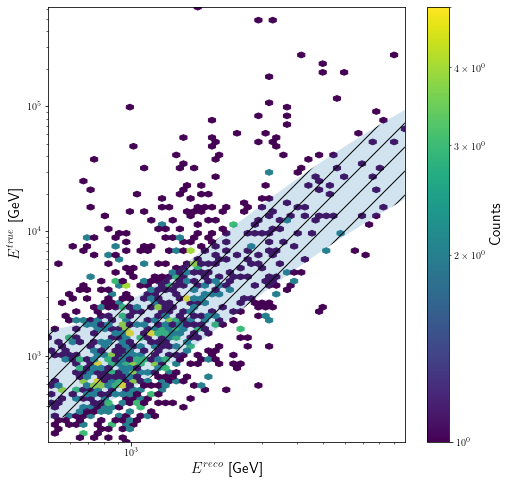

In [115]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
#hb = plt.hexbin(true_df[min_mask & max_mask].reco_energy, true_df[min_mask & max_mask].true_energy, xscale='log', yscale='log', gridsize=(50,50), bins='log', mincnt=1, alpha=1)
hb=plt.hexbin(true_df.reco_energy, true_df.true_energy, xscale='log', yscale='log', gridsize=(50,50), bins='log', mincnt=1, alpha=1)
plt.fill_between(sample_Ereco, model_Etrue_min, model_Etrue_max, alpha=0.5)
#plt.plot(df.reco_energy, df.reco_energy, ls = '--',alpha = 0.6, c='black')
plt.ylim(true_df.true_energy.min(), true_df.true_energy.max())
plt.xlim(true_df.reco_energy.min(), true_df.reco_energy.max())
plt.xlabel(r'$E^{reco}$ [GeV]', fontsize=15)
plt.ylabel(r'$E^{true}$ [GeV]', fontsize=15)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Counts', fontsize=15)